In [4]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [139]:
class Adaline:

    def __init__(self, lr=0.01, epochs=50, shuffle=True):
        self.lr = lr
        self.epochs = epochs
        self.init_weights()
        self.shuffle = shuffle

    def init_weights(self):
        self.weights = torch.rand(2)
        self.bias = torch.Tensor([0])

    def shuffle_(self, X, y):
        idx = torch.randperm(X.shape[0])
        return X[idx], y[idx]
    
    def fit_full_batch(self, X, y):
        X = torch.Tensor(X)
        y = torch.Tensor(y)
        loss = []
        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = y - output

            # Using Gradient Descent to update the weights and bias (see notes for the derivation)
            self.weights += self.lr * 2 * X.T @ error / X.shape[0]
            self.bias += self.lr * 2 * error.mean()
            
            loss.append((error**2).mean())
            
            # if epoch % 10 == 0:
            #     print(f'epoch {epoch} \t loss {loss[-1]}')
        return loss
    
    def fit_stochastic(self, X, y):
        X = torch.Tensor(X)
        y = torch.Tensor(y)
        total_loss = []
        for epoch in range(self.epochs):
            losses = []
            if self.shuffle:
                X, y = self.shuffle_(X, y)
            for xi, yi in zip(X, y):
                net_input = xi @ self.weights + self.bias

                output = self.activation(net_input)
                error = yi - output

                # Using Gradient Descent to update the weights and bias (see notes for the derivation)
                self.weights += self.lr * 2 * xi.T * error
                self.bias += self.lr * 2 * error
                loss = error**2
                losses.append(loss)
            total_loss.append(torch.stack(losses).mean())
            
        return total_loss

    def fit_mini_batch(self, X, y, batch_size=10):
        X = torch.Tensor(X)
        y = torch.Tensor(y)
        total_loss = []
        for epoch in range(self.epochs):
            losses = []
            for i in range(0, X.shape[0], batch_size):
                
                net_input = self.net_input(X[i:i+batch_size])
                output = self.activation(net_input)
                error = y[i:i+batch_size] - output

                # Using Gradient Descent to update the weights and bias (see notes for the derivation)
                self.weights += self.lr * 2 * X[i:i+batch_size].T @ error / X[i:i+batch_size].shape[0]
                self.bias += self.lr * 2 * error.mean()
    
                losses.append((error**2).mean())
            total_loss.append(torch.stack(losses).mean())
        return total_loss

    def fit(self, X, y, method="full_batch"):
        if method == "full_batch":
            return self.fit_full_batch(X, y)
        elif method == "stochastic":
            return self.fit_stochastic(X, y)
        elif method == "mini_batch":
            return self.fit_mini_batch(X, y)
        else:
            raise ValueError("method must be either 'full_batch' or 'stochastic'")
        
    def activation(self, X):
        return torch.nn.Sigmoid()(X)

    def net_input(self, X):
        X = torch.Tensor(X)
        output = X @ self.weights + self.bias
        return output

    def predict(self, X, activation=True):
        output = self.net_input(X)
        if activation:
            output = torch.where(output >= 0.0, 1, 0)
        return output

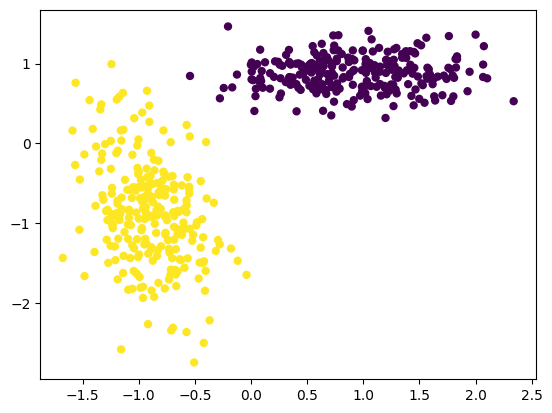

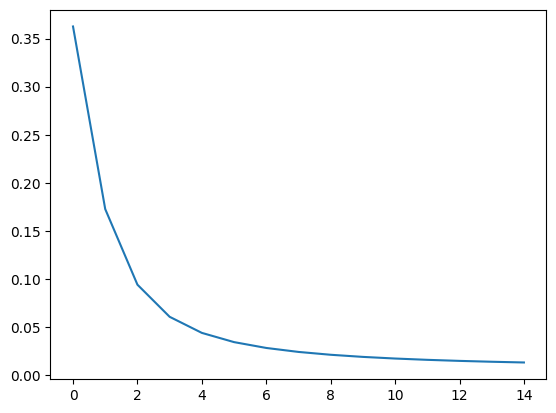

In [143]:
X_train, y_train = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=40, class_sep=1.5, n_clusters_per_class=1)

# plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train, s=25)
# plt.show()

# Standardization helps the model converge faster by finding a better learning rate that influences the different features equally
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

ada = Adaline(lr=0.01, epochs=15, shuffle=True)
loss = ada.fit(X_train, y_train, method="mini_batch")
y_pred = ada.predict(X_train, activation=True)

plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_pred, s=25)
plt.show()
plt.plot(loss)
plt.show()